In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow.nn as nn
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import sys
sys.path.insert(0,'/content/gdrive/MyDrive/C247_NNDL_Project/helper_functions')
from utils import augment_data, load_eeg_data
from models import eeg_CNN_FFT_Model

# CNN - FFT Preprocessing

## CNN - train for each subject, test individually.

In [11]:
# Hyperparams
EPOCHS = 300
batch_size = 256
fft_length = 250

Subject: 0
X_train_valid: (237, 1000, 22)
y_train_valid: (237,)
X_test: (50, 1000, 22)
y_test: (50,)
(567, 250, 1, 22)
(48, 250, 1, 22)
(50, 250, 1, 22)
(567, 250, 1, 22)
(48, 250, 1, 22)
(50, 250, 1, 22)
Epoch 1/300
18/18 [==============================] - 5s 87ms/step - loss: 3.3015 - accuracy: 0.3422 - val_loss: 26.8386 - val_accuracy: 0.2292
Epoch 2/300
18/18 [==============================] - 1s 69ms/step - loss: 2.0022 - accuracy: 0.4850 - val_loss: 22.6674 - val_accuracy: 0.2500
Epoch 3/300
18/18 [==============================] - 2s 101ms/step - loss: 1.5107 - accuracy: 0.5432 - val_loss: 14.3370 - val_accuracy: 0.2292
Epoch 4/300
18/18 [==============================] - 2s 120ms/step - loss: 1.3106 - accuracy: 0.5996 - val_loss: 8.2077 - val_accuracy: 0.2292
Epoch 5/300
18/18 [==============================] - 2s 91ms/step - loss: 1.1397 - accuracy: 0.6226 - val_loss: 5.6253 - val_accuracy: 0.2708
Epoch 6/300
18/18 [==============================] - 1s 66ms/step - loss: 0.9400

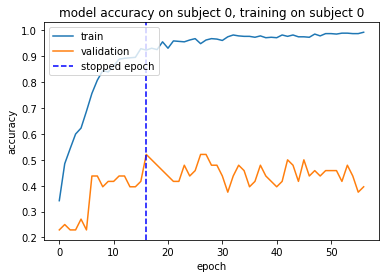

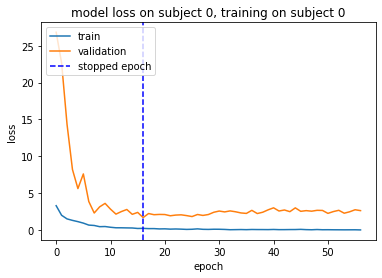

Subject: 1
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (50, 1000, 22)
y_test: (50,)
(564, 250, 1, 22)
(48, 250, 1, 22)
(50, 250, 1, 22)
(564, 250, 1, 22)
(48, 250, 1, 22)
(50, 250, 1, 22)
Epoch 1/300
18/18 [==============================] - 7s 103ms/step - loss: 3.3164 - accuracy: 0.2979 - val_loss: 27.6024 - val_accuracy: 0.2083
Epoch 2/300
18/18 [==============================] - 1s 70ms/step - loss: 2.3650 - accuracy: 0.3901 - val_loss: 17.0842 - val_accuracy: 0.3125
Epoch 3/300
18/18 [==============================] - 1s 66ms/step - loss: 1.9679 - accuracy: 0.4592 - val_loss: 19.0860 - val_accuracy: 0.2083
Epoch 4/300
18/18 [==============================] - 1s 68ms/step - loss: 1.5917 - accuracy: 0.5106 - val_loss: 8.4471 - val_accuracy: 0.2292
Epoch 5/300
18/18 [==============================] - 1s 66ms/step - loss: 1.2981 - accuracy: 0.5585 - val_loss: 5.2636 - val_accuracy: 0.3125
Epoch 6/300
18/18 [==============================] - 1s 71ms/step - loss: 1.2605 

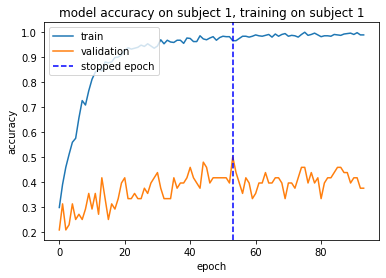

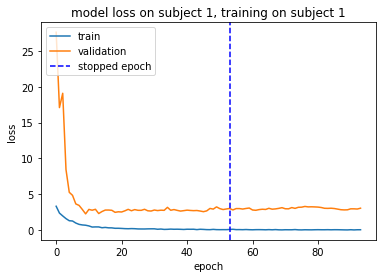

Subject: 2
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (50, 1000, 22)
y_test: (50,)
(564, 250, 1, 22)
(48, 250, 1, 22)
(50, 250, 1, 22)
(564, 250, 1, 22)
(48, 250, 1, 22)
(50, 250, 1, 22)
Epoch 1/300
18/18 [==============================] - 4s 84ms/step - loss: 2.7341 - accuracy: 0.3582 - val_loss: 13.3732 - val_accuracy: 0.4167
Epoch 2/300
18/18 [==============================] - 1s 74ms/step - loss: 2.1229 - accuracy: 0.4450 - val_loss: 17.4457 - val_accuracy: 0.3333
Epoch 3/300
18/18 [==============================] - 1s 69ms/step - loss: 1.7963 - accuracy: 0.5035 - val_loss: 10.9029 - val_accuracy: 0.4792
Epoch 4/300
18/18 [==============================] - 1s 70ms/step - loss: 1.4146 - accuracy: 0.5780 - val_loss: 5.9464 - val_accuracy: 0.5417
Epoch 5/300
18/18 [==============================] - 2s 122ms/step - loss: 1.1000 - accuracy: 0.6560 - val_loss: 5.0789 - val_accuracy: 0.3750
Epoch 6/300
18/18 [==============================] - 2s 120ms/step - loss: 0.9479

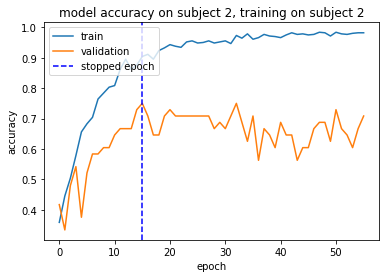

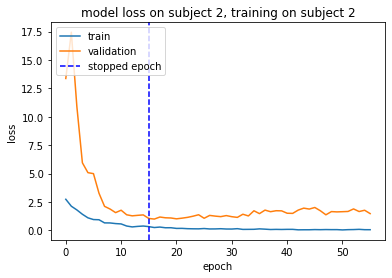

Subject: 3
X_train_valid: (234, 1000, 22)
y_train_valid: (234,)
X_test: (50, 1000, 22)
y_test: (50,)
(561, 250, 1, 22)
(47, 250, 1, 22)
(50, 250, 1, 22)
(561, 250, 1, 22)
(47, 250, 1, 22)
(50, 250, 1, 22)
Epoch 1/300
18/18 [==============================] - 4s 85ms/step - loss: 3.0554 - accuracy: 0.3333 - val_loss: 39.1860 - val_accuracy: 0.1915
Epoch 2/300
18/18 [==============================] - 1s 71ms/step - loss: 2.3593 - accuracy: 0.3922 - val_loss: 17.8468 - val_accuracy: 0.2766
Epoch 3/300
18/18 [==============================] - 1s 66ms/step - loss: 1.6295 - accuracy: 0.5205 - val_loss: 15.4847 - val_accuracy: 0.2979
Epoch 4/300
18/18 [==============================] - 1s 76ms/step - loss: 1.3633 - accuracy: 0.5490 - val_loss: 7.1966 - val_accuracy: 0.2128
Epoch 5/300
18/18 [==============================] - 2s 121ms/step - loss: 1.3198 - accuracy: 0.5918 - val_loss: 8.8943 - val_accuracy: 0.2979
Epoch 6/300
18/18 [==============================] - 2s 121ms/step - loss: 1.0693

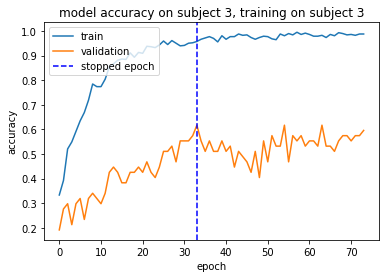

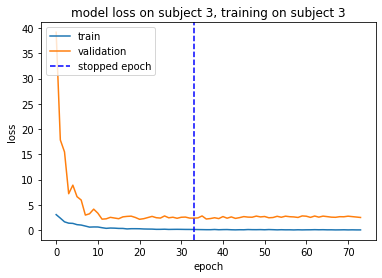

Subject: 4
X_train_valid: (235, 1000, 22)
y_train_valid: (235,)
X_test: (47, 1000, 22)
y_test: (47,)
(564, 250, 1, 22)
(47, 250, 1, 22)
(47, 250, 1, 22)
(564, 250, 1, 22)
(47, 250, 1, 22)
(47, 250, 1, 22)
Epoch 1/300
18/18 [==============================] - 5s 84ms/step - loss: 2.9186 - accuracy: 0.3599 - val_loss: 9.8260 - val_accuracy: 0.3830
Epoch 2/300
18/18 [==============================] - 1s 68ms/step - loss: 1.7813 - accuracy: 0.4982 - val_loss: 6.4396 - val_accuracy: 0.4043
Epoch 3/300
18/18 [==============================] - 1s 72ms/step - loss: 1.3351 - accuracy: 0.6294 - val_loss: 4.1594 - val_accuracy: 0.4681
Epoch 4/300
18/18 [==============================] - 1s 68ms/step - loss: 1.0301 - accuracy: 0.7057 - val_loss: 5.6870 - val_accuracy: 0.4468
Epoch 5/300
18/18 [==============================] - 1s 71ms/step - loss: 0.8646 - accuracy: 0.7535 - val_loss: 3.4846 - val_accuracy: 0.5319
Epoch 6/300
18/18 [==============================] - 1s 69ms/step - loss: 0.7954 - ac

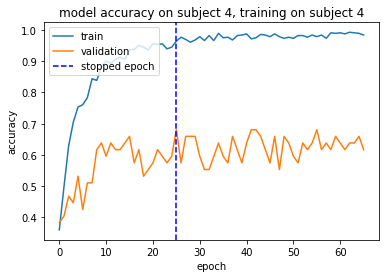

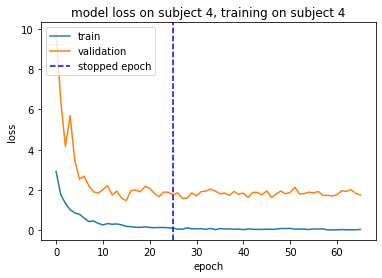

Subject: 5
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (49, 1000, 22)
y_test: (49,)
(564, 250, 1, 22)
(48, 250, 1, 22)
(49, 250, 1, 22)
(564, 250, 1, 22)
(48, 250, 1, 22)
(49, 250, 1, 22)
Epoch 1/300
18/18 [==============================] - 4s 87ms/step - loss: 2.7195 - accuracy: 0.3635 - val_loss: 28.8650 - val_accuracy: 0.2917
Epoch 2/300
18/18 [==============================] - 2s 105ms/step - loss: 2.0804 - accuracy: 0.4468 - val_loss: 19.2859 - val_accuracy: 0.2917
Epoch 3/300
18/18 [==============================] - 2s 121ms/step - loss: 1.6595 - accuracy: 0.5177 - val_loss: 10.8447 - val_accuracy: 0.2917
Epoch 4/300
18/18 [==============================] - 2s 97ms/step - loss: 1.2234 - accuracy: 0.6099 - val_loss: 7.5216 - val_accuracy: 0.3333
Epoch 5/300
18/18 [==============================] - 1s 69ms/step - loss: 0.9977 - accuracy: 0.6702 - val_loss: 8.7353 - val_accuracy: 0.3333
Epoch 6/300
18/18 [==============================] - 1s 69ms/step - loss: 1.0736

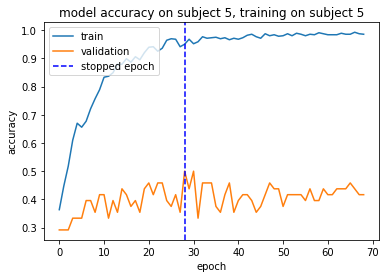

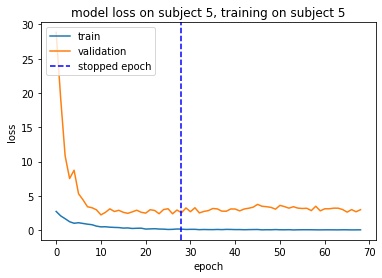

Subject: 6
X_train_valid: (238, 1000, 22)
y_train_valid: (238,)
X_test: (50, 1000, 22)
y_test: (50,)
(570, 250, 1, 22)
(48, 250, 1, 22)
(50, 250, 1, 22)
(570, 250, 1, 22)
(48, 250, 1, 22)
(50, 250, 1, 22)
Epoch 1/300
18/18 [==============================] - 5s 86ms/step - loss: 2.9847 - accuracy: 0.4000 - val_loss: 36.0699 - val_accuracy: 0.2917
Epoch 2/300
18/18 [==============================] - 1s 71ms/step - loss: 1.8934 - accuracy: 0.5070 - val_loss: 12.4964 - val_accuracy: 0.3958
Epoch 3/300
18/18 [==============================] - 1s 72ms/step - loss: 1.3643 - accuracy: 0.6035 - val_loss: 11.2452 - val_accuracy: 0.3750
Epoch 4/300
18/18 [==============================] - 1s 73ms/step - loss: 1.0168 - accuracy: 0.6912 - val_loss: 8.3878 - val_accuracy: 0.3542
Epoch 5/300
18/18 [==============================] - 1s 72ms/step - loss: 0.9453 - accuracy: 0.6947 - val_loss: 5.7057 - val_accuracy: 0.3750
Epoch 6/300
18/18 [==============================] - 1s 73ms/step - loss: 0.8733 -

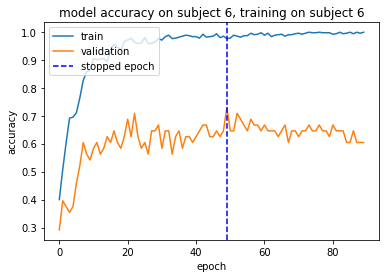

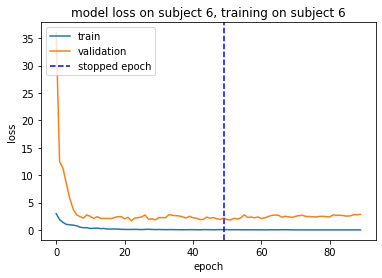

Subject: 7
X_train_valid: (232, 1000, 22)
y_train_valid: (232,)
X_test: (50, 1000, 22)
y_test: (50,)
(555, 250, 1, 22)
(47, 250, 1, 22)
(50, 250, 1, 22)
(555, 250, 1, 22)
(47, 250, 1, 22)
(50, 250, 1, 22)
Epoch 1/300
18/18 [==============================] - 6s 139ms/step - loss: 2.8919 - accuracy: 0.3495 - val_loss: 36.5876 - val_accuracy: 0.2553
Epoch 2/300
18/18 [==============================] - 2s 117ms/step - loss: 2.1430 - accuracy: 0.4523 - val_loss: 13.9700 - val_accuracy: 0.2766
Epoch 3/300
18/18 [==============================] - 2s 124ms/step - loss: 1.2502 - accuracy: 0.6108 - val_loss: 14.1727 - val_accuracy: 0.2553
Epoch 4/300
18/18 [==============================] - 2s 130ms/step - loss: 1.2618 - accuracy: 0.6270 - val_loss: 4.2399 - val_accuracy: 0.4468
Epoch 5/300
18/18 [==============================] - 1s 69ms/step - loss: 1.0938 - accuracy: 0.6793 - val_loss: 4.3355 - val_accuracy: 0.3830
Epoch 6/300
18/18 [==============================] - 1s 71ms/step - loss: 0.82

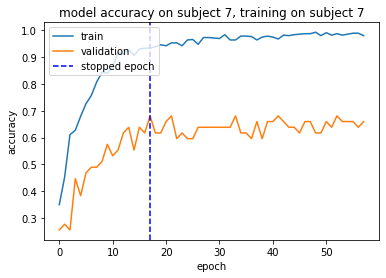

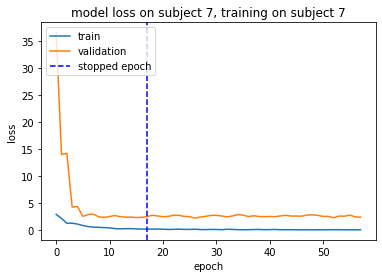

Subject: 8
X_train_valid: (231, 1000, 22)
y_train_valid: (231,)
X_test: (47, 1000, 22)
y_test: (47,)
(552, 250, 1, 22)
(47, 250, 1, 22)
(47, 250, 1, 22)
(552, 250, 1, 22)
(47, 250, 1, 22)
(47, 250, 1, 22)
Epoch 1/300
18/18 [==============================] - 5s 92ms/step - loss: 2.5746 - accuracy: 0.4221 - val_loss: 25.7881 - val_accuracy: 0.3617
Epoch 2/300
18/18 [==============================] - 2s 120ms/step - loss: 1.7034 - accuracy: 0.5779 - val_loss: 27.3507 - val_accuracy: 0.2979
Epoch 3/300
18/18 [==============================] - 2s 87ms/step - loss: 1.0667 - accuracy: 0.6884 - val_loss: 18.5328 - val_accuracy: 0.2979
Epoch 4/300
18/18 [==============================] - 1s 72ms/step - loss: 0.8469 - accuracy: 0.7246 - val_loss: 11.0328 - val_accuracy: 0.2979
Epoch 5/300
18/18 [==============================] - 1s 72ms/step - loss: 0.5965 - accuracy: 0.7917 - val_loss: 6.1591 - val_accuracy: 0.3191
Epoch 6/300
18/18 [==============================] - 1s 71ms/step - loss: 0.4251

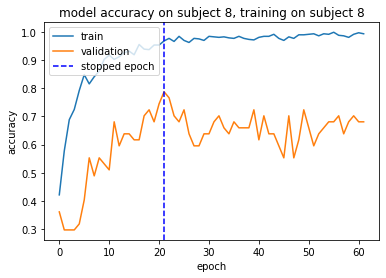

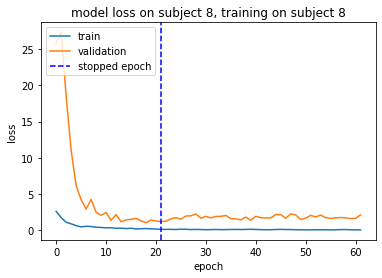

In [13]:
# Train for each subject
test_accuracies = []
test_losses = []
valid_accuracies = []
valid_losses = []
train_accuracies = []
train_losses = []

for subject in range(9):
  print('Subject:', subject)

  # import data
  data = load_eeg_data(subject_index = subject, one_hot_ylabel=False)

  # train/valid split and preprocessing
  X_train, X_valid, y_train, y_valid = train_test_split(data['X_train_valid'], data['y_train_valid'], test_size=0.2)
  
  X_train, y_train = augment_data(X_train, y_train, noise_var = 0.5) 
  X_valid, y_valid = augment_data(X_valid, y_valid, noise=False, filter=False, max_pool=False, avg_pool=False)
  X_test, y_test = augment_data(data['X_test'], data['y_test'], noise=False, filter=False, max_pool=False, avg_pool=False) 
  
  # fft on time-data
  fft_train = np.fft.fft(X_train, n=fft_length, axis=-2)
  fft_valid = np.fft.fft(X_valid, n=fft_length, axis=-2)
  fft_test = np.fft.fft(X_test, n=fft_length, axis=-2)

  # format time data for convolutions
  X_train = np.expand_dims(X_train, axis = -2)
  X_valid = np.expand_dims(X_valid, axis = -2)
  X_test = np.expand_dims(X_test, axis = -2)

  # format fft for convolutions
  fft_train = np.expand_dims(fft_train, axis = -2)
  fft_valid = np.expand_dims(fft_valid, axis = -2)
  fft_test = np.expand_dims(fft_test, axis = -2)
  
  print(X_train.shape)
  print(X_valid.shape)
  print(X_test.shape)

  print(fft_train.shape)
  print(fft_valid.shape)
  print(fft_test.shape)

  # define early stopping
  cb = tf.keras.callbacks.EarlyStopping(
      monitor="val_accuracy",
      min_delta=0,
      patience=40,
      verbose=1,
      mode="auto",
      baseline=None,
      restore_best_weights=True,
      start_from_epoch=0,
  )

  # define learning schedule
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate=0.005,
      decay_steps=20,
      decay_rate=0.98,
      staircase=True)

  # define loss function
  loss_fn = keras.losses.SparseCategoricalCrossentropy()

  # define optimizer
  opt = keras.optimizers.Adam(learning_rate=lr_schedule)

  # build model
  input_shape = X_train.shape[1:]
  model = eeg_CNN_FFT_Model(input_shape)

  # compile model
  model.compile(optimizer=opt, loss=loss_fn, metrics='accuracy')

  # Rename for clarity
  train_time = X_train
  valid_time = X_valid
  test_time = X_test
  train_fft = fft_train
  valid_fft = fft_valid
  test_fft = fft_test

  # fit model
  history = model.fit(x=[train_time, train_fft], y=y_train, validation_data=([valid_time, valid_fft], y_valid), epochs=EPOCHS, callbacks=cb)
  
  # test model
  print("----- TEST -----")
  eval = model.evaluate(x=[test_time, test_fft], y=y_test)
  test_loss, test_acc = eval[0], eval[1]
  stop_epoch = cb.stopped_epoch - 40
  valid_loss = history.history['val_loss'][stop_epoch-1]
  print(valid_loss)

  test_losses.append(test_loss)
  test_accuracies.append(test_acc)
  valid_losses.append(valid_loss)
  
  # plotting
  
  # plot history (accuracy)
  plt.figure()
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.axvline(x = stop_epoch, color = 'b', linestyle='--')
  plt.title('model accuracy on subject {}, training on subject {}'.format(subject, subject))
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation', 'stopped epoch'], loc='upper left')
  plt.show()
  
  # plot history (loss)
  plt.figure()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.axvline(x = stop_epoch, color = 'b', linestyle='--')
  plt.title('model loss on subject {}, training on subject {}'.format(subject, subject))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation', 'stopped epoch'], loc='upper left')
  plt.show()

In [15]:
for i, acc in enumerate(test_accuracies):
  print('Accuracy for subject {} is {}'.format(i, acc))

for i, loss in enumerate(test_losses):
  print('Loss for subject {} is {}'.format(i, loss))

Accuracy for subject 0 is 0.6200000047683716
Accuracy for subject 1 is 0.5400000214576721
Accuracy for subject 2 is 0.5799999833106995
Accuracy for subject 3 is 0.47999998927116394
Accuracy for subject 4 is 0.7234042286872864
Accuracy for subject 5 is 0.3877550959587097
Accuracy for subject 6 is 0.6800000071525574
Accuracy for subject 7 is 0.6000000238418579
Accuracy for subject 8 is 0.6808510422706604
Loss for subject 0 is 1.9922003746032715
Loss for subject 1 is 2.3302299976348877
Loss for subject 2 is 1.8908392190933228
Loss for subject 3 is 1.912266492843628
Loss for subject 4 is 1.8261696100234985
Loss for subject 5 is 2.9460010528564453
Loss for subject 6 is 1.9234145879745483
Loss for subject 7 is 1.5071896314620972
Loss for subject 8 is 1.3815195560455322


## Train on all - test on each individul and also all

In [16]:
# Hyperparams
EPOCHS = 300
batch_size = 512

In [18]:
# Train on data consisting of all subjects
# import data
data = load_eeg_data(subject_index = None, one_hot_ylabel=False)

# train/valid split and preprocessing
X_train, X_valid, y_train, y_valid = train_test_split(data['X_train_valid'], data['y_train_valid'], test_size=0.2)

X_train, y_train = augment_data(X_train, y_train, noise_var = 0.5) 
X_valid, y_valid = augment_data(X_valid, y_valid, noise=False, filter=False, max_pool=False, avg_pool=False)
X_test, y_test = augment_data(data['X_test'], data['y_test'], noise=False, filter=False, max_pool=False, avg_pool=False) 

# fft on time-data
fft_train = np.fft.fft(X_train, n=fft_length, axis=-2)
fft_valid = np.fft.fft(X_valid, n=fft_length, axis=-2)
fft_test = np.fft.fft(X_test, n=fft_length, axis=-2)

# format time data for convolutions
X_train = np.expand_dims(X_train, axis = -2)
X_valid = np.expand_dims(X_valid, axis = -2)
X_test = np.expand_dims(X_test, axis = -2)

# format fft for convolutions
fft_train = np.expand_dims(fft_train, axis = -2)
fft_valid = np.expand_dims(fft_valid, axis = -2)
fft_test = np.expand_dims(fft_test, axis = -2)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

print(fft_train.shape)
print(fft_valid.shape)
print(fft_test.shape)

# define early stopping
cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=40,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

# define learning schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=20,
    decay_rate=0.98,
    staircase=True)

# define loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy()

# define optimizer
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

# build model
input_shape = X_train.shape[1:]
model = eeg_CNN_FFT_Model(input_shape)

# compile model
model.compile(optimizer=opt, loss=loss_fn, metrics='accuracy')

# Rename for clarity
train_time = X_train
valid_time = X_valid
test_time = X_test
train_fft = fft_train
valid_fft = fft_valid
test_fft = fft_test

# fit model
history = model.fit(x=[train_time, train_fft], y=y_train, validation_data=([valid_time, valid_fft], y_valid), epochs=EPOCHS, callbacks=cb)

X_train_valid: (2115, 1000, 22)
y_train_valid: (2115,)
X_test: (443, 1000, 22)
y_test: (443,)
(5076, 250, 1, 22)
(423, 250, 1, 22)
(443, 250, 1, 22)
(5076, 250, 1, 22)
(423, 250, 1, 22)
(443, 250, 1, 22)
Epoch 1/300
159/159 [==============================] - 15s 81ms/step - loss: 2.3038 - accuracy: 0.3355 - val_loss: 1.7674 - val_accuracy: 0.3617
Epoch 2/300
159/159 [==============================] - 17s 108ms/step - loss: 1.5344 - accuracy: 0.4210 - val_loss: 1.3095 - val_accuracy: 0.4515
Epoch 3/300
159/159 [==============================] - 13s 79ms/step - loss: 1.3314 - accuracy: 0.4720 - val_loss: 1.2143 - val_accuracy: 0.4965
Epoch 4/300
159/159 [==============================] - 11s 72ms/step - loss: 1.2101 - accuracy: 0.5089 - val_loss: 1.1612 - val_accuracy: 0.4894
Epoch 5/300
159/159 [==============================] - 12s 72ms/step - loss: 1.0935 - accuracy: 0.5494 - val_loss: 1.1165 - val_accuracy: 0.5343
Epoch 6/300
159/159 [==============================] - 12s 78ms/step -

----- TESTING ON ALL SUBJECTS -----
14/14 [==============================] - 0s 19ms/step - loss: 0.9103 - accuracy: 0.6479
loss: 0.9103260636329651
acc: 0.6478555202484131


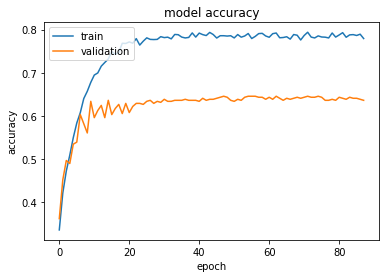

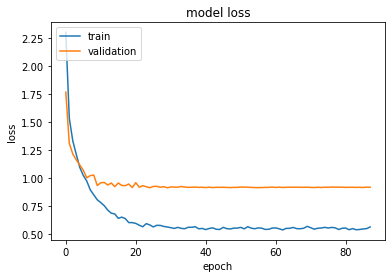

In [19]:
# Test model on all-subject dataset
# test model
print("----- TESTING ON ALL SUBJECTS -----")
eval = model.evaluate(x=[test_time, test_fft], y=y_test)
loss, acc = eval[0], eval[1]
print('loss:', loss)
print('acc:', acc)

# plotting
plt.figure()
# plot history (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# plot history (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
# Test model on each individual subject
for subject in range(9):
  print("----- TESTING ON SUBJECT {} -----".format(subject))

  # import data
  data = load_eeg_data(subject_index = subject, one_hot_ylabel=False)

  # preprocessing
  X_test, y_test = augment_data(data['X_test'], data['y_test'], noise=False, filter=False, max_pool=False, avg_pool=False) 
  
  # Fast Fourier Transform
  fft_test = np.fft.fft(X_test, n=fft_length, axis=-2)

  # Reshape for CNN
  X_test = np.expand_dims(X_test, axis = -2)
  fft_test = np.expand_dims(fft_test, axis = -2)
  
  test_time = X_test
  test_fft = fft_test

  print(X_test.shape)
  print(fft_test.shape)

  # Rename for clarity

  
  results_test = model.evaluate(x=[test_time, test_fft], y=y_test)

  print('Testing Loss: {}'.format(results_test[0]))
  print('Testing Accuracy: {}'.format(results_test[1])) 
  print('\n')

----- TESTING ON SUBJECT 0 -----
X_train_valid: (237, 1000, 22)
y_train_valid: (237,)
X_test: (50, 1000, 22)
y_test: (50,)
(50, 250, 1, 22)
(50, 250, 1, 22)
2/2 [==============================] - 0s 16ms/step - loss: 1.1044 - accuracy: 0.5000
Testing Loss: 1.104379415512085
Testing Accuracy: 0.5


----- TESTING ON SUBJECT 1 -----
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (50, 1000, 22)
y_test: (50,)
(50, 250, 1, 22)
(50, 250, 1, 22)
2/2 [==============================] - 0s 16ms/step - loss: 1.0471 - accuracy: 0.5600
Testing Loss: 1.0471274852752686
Testing Accuracy: 0.5600000023841858


----- TESTING ON SUBJECT 2 -----
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (50, 1000, 22)
y_test: (50,)
(50, 250, 1, 22)
(50, 250, 1, 22)
2/2 [==============================] - 0s 16ms/step - loss: 0.9763 - accuracy: 0.6600
Testing Loss: 0.9763099551200867
Testing Accuracy: 0.6600000262260437


----- TESTING ON SUBJECT 3 -----
X_train_valid: (234, 1000, 22)
y_train